IA & Data science (LU3IN0226) -- 2020-2021
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*


# Premier bilan: classifieurs statistiques

Le but de ce notebook est de faire le point sur les premiers classifieurs qui ont été vus depuis le début du semestre.


**<font color="RED">Remarque: dans ce notebook, les sorties attendues des boîtes ont été supprimées, vous pouvez vous y référer dans le fichier HTML fourni. </font>**



## Travail à faire
Ce notebook est divisé en 2 parties. 
1. la partie "Mise en place" : ce sont les premières boîtes de ce notebook, elles servent à vérifier que vos classifieurs fonctionnent.
2. la partie "Expérimentations" : cette partie est libre, vous pouvez la compléter comme vous le souhaitez

## Rendu et exposé en semaine 9
Ce notebook est à rendre, sur Moodle, <font color="RED">**le mardi 6 avril à 16h au plus tard**</font> quel que soit votre groupe. 

Ce qui est à rendre:
1. ce notebook
2. votre fichier `Classifiers.py`
3. votre fichier `utils.py`

Les 3 fichiers doivent être mis dans un fichier archive (zip ou tar.gz ou tgz) : cette archive est remise sur le site Moodle : une archive par binôme (un seul membre soumet pour les 2).

Lors de la séance de TDTME de la semaine 9 de votre groupe, un exposé de 10mn sera fait par chaque binôme afin de présenter le travail réalisé.

Ce travail (compte-rendu et exposé) sera noté sur 10 et comptera pour 10% de la note finale d'UE.

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

KRISNI Almehdi - 3800519

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>bilan-1</tt> et rajouter à la suite de <tt>bilan-1</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient `bilan-1-Skywalker-Solo`

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

In [2]:
# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

In [3]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import pickle as pkl
%matplotlib inline  

In [4]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut


In [5]:
# Importation du package seaborn:
import seaborn as sns

In [6]:
# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# 1. Mise en place

## Données jouet

Pour être sûr d'avoir un modèle assez constant, on prend un problème très simple, c'est-à-dire un problème où les distribution des classes des données d'apprentissage sont très bien séparées. Pour cela, il suffit de générer des données selon des gaussiennes très écartées.

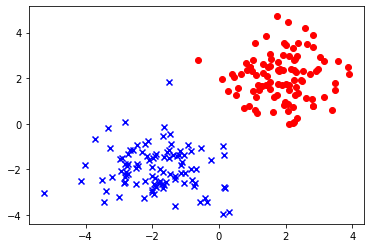

In [7]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# générer des données gaussienne 2D

N = 100
X,Y =  ut.genere_dataset_gaussian([-2,-2],[[1,0],[0,1]], [2,2],[[1,0],[0,1]],N)

ut.plot2DSet(X,Y)

# remarque: dans votre fonction plot2DSet() rajouter la ligne suivante:
# plt.grid(True)
# afin d'avoir l'affichage d'une grille pour les valeurs des axes

Pour vérifier que les valeurs sont les mêmes pour les 5 premiers exemples:

In [8]:
# Exemples de la classe +1
X[Y==+1][0:5,:]

array([[-1.64221264, -1.43921547],
       [-0.91694876, -0.94619795],
       [-3.37766937, -2.93782504],
       [-1.48496473, -1.48621405],
       [-1.48495231,  1.85273149]])

In [9]:
# Exemples de la classe -1
X[Y==-1][0:5,:]

array([[2.49671415, 1.8617357 ],
       [2.64768854, 3.52302986],
       [1.76584663, 1.76586304],
       [3.57921282, 2.76743473],
       [1.53052561, 2.54256004]])

<font color="RED" size="+1">[Q]</font> Avant d'appliquer un classifieur, proposer une droite, passant par l'origine, et permettant de séparer les exemples des 2 classes.

Une fois votre droite trouvée, comme elle passe par le point $(0,0)$, elle vérifie donc l'équation $w_1 x_1+w_2 x_2 =0$, calculer (à la main) les valeurs de $w_1$ et $w_2$ pour cette droite.

<font color="RED" size="+1">[Q]</font> Je propose l'utilisation de la droite passant par les points (0,0) et (1, -1) afin de séparer les exemples des 2 classes.

De ce fait, on a x + y = 0 donc :
x + y = (w1 * x1) + (w2 * x2) => w1 = 1 et w2 = -1.

Il s'agit de la droite d'équation y = -x.

##  Algorithme des $k$ plus proches voisins


Accuracy pour k=1:  1.0


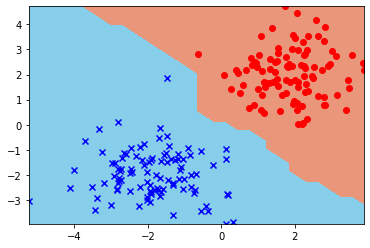

In [10]:
# Création d'un knn avec k=1 et 2 dimensions pour les données
classifierKNN = classif.ClassifierKNN(2,1)

# Entraînement du classifier:
classifierKNN.train(X,Y)

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X,Y,classifierKNN)
ut.plot2DSet(X,Y)

# Performance de ce classifieur:
print("Accuracy pour k=1: ", classifierKNN.accuracy(X,Y))

Accuracy pour k=5:  0.995


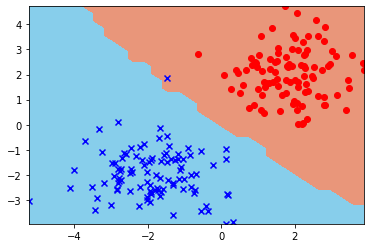

In [11]:
# Création d'un knn avec k=5 et 2 dimensions pour les données
classifierKNN5 = classif.ClassifierKNN(2,5)

# Entraînement du classifier:
classifierKNN5.train(X,Y)

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X,Y,classifierKNN5)
ut.plot2DSet(X,Y)

# Performance de ce classifieur:
print("Accuracy pour k=5: ",classifierKNN5.accuracy(X,Y))

<font color="RED" size="+1">[Q]</font> Combien d'exemples sont mal classés par l'algorithme des kppv quand $k$ vaut 5? Pourquoi sont-ils mal classés ? Vérifiez "à la main" que le résultat est correct en ce qui les concerne.

<font color="RED" size="+1">[R]</font> Le nombre de points mal classés par l'algorithme des kppv quand k vaut 5 est de 1. Ce point est mal classé puisque parmi ses 5 plus proches points voisins, la majorité de ces points ne font pas partie de sa classe. Il s'agit du point bleu dans la partie rouge de la frontière dans l'affichage.

On peut vérifier à la main grace au code en-dessous que le résultat est correct en qui concerne ce point en vérifiant le label de ses 5 plus proches voisins.

In [12]:
# On cherche ce point (on vérifie si il est mal classé)
x = None
for p in range(len(classifierKNN5.desc_set)) :
    if (classifierKNN5.score(classifierKNN5.desc_set[p]) != classifierKNN5.label_set[p]) :
        x = classifierKNN5.desc_set[p]

# On calcule les distance de x au reste des points
distances_x = []
index = []
for k in range(len(classifierKNN5.desc_set)) :
    distances_x.append(classifierKNN5.distance(x, classifierKNN5.desc_set[k]))
    index.append(k)

# On zip les listes
new_tab = list(zip(distances_x, index))
new_tab.sort(key = lambda i: i[0])

# On affiche le label des 5 plus proches voisins de x
ppv = []
for i in range(1, 6) :
    ppv.append(new_tab[i][1])
print("Le label des 5 plus proches voisins du point mal classés sont :\n", classifierKNN5.label_set[ppv])

Le label des 5 plus proches voisins du point mal classés sont :
 [-1 -1 -1 -1 -1]


##  Perceptron de Rosenblatt

Information sur le perceptron implémenté qui a été utilisé par la suite dans ce notebook:
- initialisation des poids : mis à 0
- méthode train: un seul parcours de tous le training set en prenant les exemples dans un ordre aléatoire (généré par shuffle)
- mise à jour des poids dans le train: à chaque mauvaise classification, version du TME3, une mauvaise classification se produit quand la prédiction n'est pas la classe de l'exemple.


<font color="RED" size="+1">ATTENTION !</font> L'algorithme du perceptron que l'on a vu peut être implémenté de différentes manières, il se peut donc que vous ne trouviez pas **exactement** les mêmes valeurs que celles qui sont indiquées en résultat dans les boîtes qui suivent. Cela peut être normal !

### Essai avec un learning rate faible

<font color="RED" size="+1">[Q]</font> Avant de réaliser les expérimentations suivantes, rajouter dans la classe `ClassifieurPerceptron` un accesseur pour le vecteur de poids courant du classifieur:

In [13]:
#  A RAJOUTER DANS LA CLASSE ClassifierPerceptron:

def getW(self):
    """ rend le vecteur de poids actuel du perceptron
    """
    return self.w

Accuracy du perceptron ( 0.001 ) après 1 train:  1.0
Vecteur de poids trouvé:  [-0.00303844 -0.00100367]


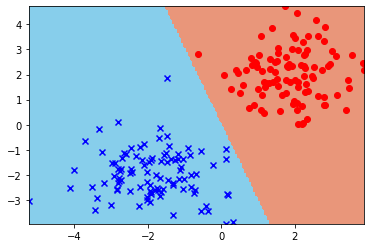

In [14]:
# Choix du learning rate
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)  

# Création d'un perceptron
perceptronV0 = classif.ClassifierPerceptron(2, learning_rate)

# Entraînement du classifier:
perceptronV0.train(X,Y)

# Affichage de la frontière de séparation des classes
# On augmente la qualité du tracé en prenant un step élevé:
ut.plot_frontiere(X,Y,perceptronV0,step=150)
ut.plot2DSet(X,Y)

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après 1 train: ",perceptronV0.accuracy(X,Y))
print("Vecteur de poids trouvé: ", perceptronV0.getW())

<font color="RED" size="+1">[Q]</font> Comparer le vecteur de poids trouvé par votre classifieur avec les poids de la droite que vous aviez proposés. Qu'en pensez-vous ?

<font color="RED" size="+1">[R]</font> J'avais proposé la droite d'équation y = -x, soit x + y = 0.
<br/>Je remarque que la droite que j'ai proposé correspond à peu près avec celle affichée lors de l'affichage de la frontière.

On décide de réaliser plusieurs fois l'apprentissage du perceptron:

Accuracy du perceptron ( 0.001 ) après les 11 train:  1.0
Vecteur de poids trouvé:  [-0.00303844 -0.00100367]


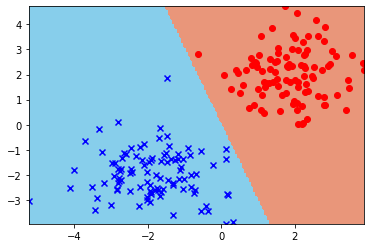

In [15]:
# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# on rajoute 10 appels de train après le train de la boîte précédente
for i in range(0,10):
    perceptronV0.train(X,Y)
    
# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X,Y,perceptronV0,step=150)
ut.plot2DSet(X,Y)

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après les 11 train: ",perceptronV0.accuracy(X,Y))  
print("Vecteur de poids trouvé: ", perceptronV0.getW())

<font color="RED" size="+1">[Q]</font> Que constate-t-on sur le vecteur des poids ? Est-ce normal ? Expliquez.

<font color="RED" size="+1">[R]</font> On remarque les valeurs du vecteur des poids ne change pas puisque la forme de la frontière ne change pas (il y a une différence mais elle n'est pas flagrante).
<br/>Cela s'explique du fait qu'après la première utilisation de train, la majorité, voire l'ensemble, des points se retrouvent bien classés, soit w * score(x) * y > 0, et qu'il n y a plus de mises à jour des poids.

## Affichage de l'évolution du coût (cf. TME4)


Accuracy du perceptron ( 0.001 ):  1.0
Vecteur de poids final trouvé:  [-0.00303844 -0.00100367]


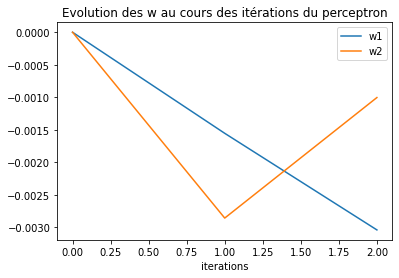

In [16]:
# Choix du learning rate
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)  

# Création et entraînement du perceptron sur les données générées
# On utilise la mémorisation de l'historique des poids comme vu en TME 4
perceptronV1 = classif.ClassifierPerceptron(2, learning_rate, history=True)

# on réalise 10 appels de train:
for i in range(0,10):
    perceptronV1.train(X,Y)

# récupération de l'évolution des w au cours de l'apprentissage 
allw = np.array(perceptronV1.allw) # si allw est sous forme de liste

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,"): ",perceptronV1.accuracy(X,Y)) 
print("Vecteur de poids final trouvé: ", perceptronV1.getW())

On va faire la même chose mais cette fois-ci, on utilise la version du Perceptron avec biais implémentée lors du TME 4 : c'est-à-dire une version où les points ne sont considérés bien classés que dans le cas où $f(\mathbf x_i) y_i>1$ (cela influence donc sur la mise à jour des poids).


Accuracy du perceptron ( 0.001 ):  1.0
Nombre de mises à jour des poids:  5029


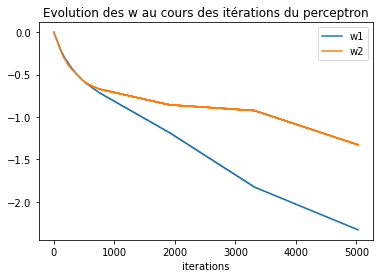

In [17]:
np.random.seed(42)   # on prend 42 comme graine

learning_rate =1e-3

# Création et entraînement du perceptron sur les données générées
perceptronV2b = classif.ClassifierPerceptronBiais(2, learning_rate, history=True)

# on rajoute 10 appels de train après le train de la boîte précédente:
for i in range(0,5000):
    perceptronV2b.train(X,Y)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
allw = np.array(perceptronV2b.allw) # si allw est sous forme de liste

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,"): ",perceptronV2b.accuracy(X,Y))  
print("Nombre de mises à jour des poids: ",len(allw))

Accuracy du perceptron ( 0.001 ) après 100 train:  0.995
Vecteur de poids trouvé:  [-0.74174438 -0.68395539]


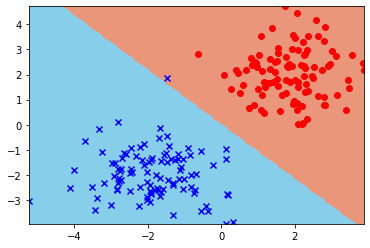

In [18]:
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3
# Création d'un perceptron
perceptronV2 = classif.ClassifierPerceptronBiais(2,learning_rate,history=True)

# on rajoute 100 appels de train:
t = 100
for i in range(0, t):
    perceptronV2.train(X,Y)
    
# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X,Y,perceptronV2,step=150)
ut.plot2DSet(X,Y)

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après", t, "train: ",perceptronV2.accuracy(X,Y))  
print("Vecteur de poids trouvé: ", perceptronV2.getW())

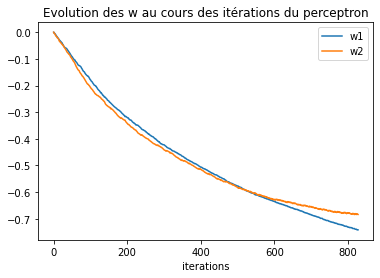

In [19]:
# récupération de l'évolution des w au cours de l'apprentissage 
allw = np.array(perceptronV2.allw) # si allw est sous forme de liste

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])


## Cross-validation

Si ce n'est pas déjà encore fait, pensez à rajouter les fonctions `crossval` et `crossval_strat` écrites au TME 4 dans le fichier `utils.py` de votre librairie `iads`.


In [20]:
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

niter = 10 
perf = []

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X, Y, niter, i)
    cl = classif.ClassifierPerceptronBiais(2,learning_rate)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  180  |Ytest|=  20 	perf=  0.95
Apprentissage  2 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  3 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  4 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  5 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  6 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  7 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  8 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  9 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  10 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0

Résultat global:	moyenne= 0.995	écart-type= 0.015


## Données plus compliquées

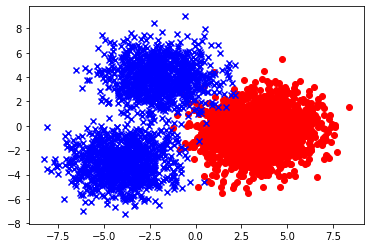

In [21]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# générer des données gaussienne 2D

N = 1000
X1,Y1 =  ut.genere_dataset_gaussian([-4,-3],[[2,0],[0,2]], [4,0],[[2,0],[0,2]],N)
X2,Y2 =  ut.genere_dataset_gaussian([-2,4],[[2,0],[0,2]], [3,-1],[[2,0],[0,2]],N)

Xdur = np.concatenate((X1,X2))
Ydur = np.concatenate((Y1,Y2))

ut.plot2DSet(Xdur,Ydur)


In [22]:
# On va utiliser un chronomètre pour avoir le temps d'exécution :
import timeit


In [23]:
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

niter = 10 
perf = []

nb_train = 20 # Nombre de lancement de la fonction train()

tic = timeit.default_timer() # heure de départ

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xdur, Ydur, niter, i)
    cl = classif.ClassifierPerceptronBiais(2,learning_rate)
    
    for j in range(0,nb_train):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])
    
toc = timeit.default_timer() # heure d'arrivée

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)

print(f'\nTemps mis: PerceptronBiais avec nb_train= {nb_train} --> {toc-tic:.5f} secondes')
print(f'Résultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.99
Apprentissage  2 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.985
Apprentissage  3 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9925
Apprentissage  4 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9775
Apprentissage  5 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9825
Apprentissage  6 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.965
Apprentissage  7 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9925
Apprentissage  8 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9775
Apprentissage  9 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.985
Apprentissage  10 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.98

Temps mis: PerceptronBiais avec nb_train= 20 --> 1.31638 secondes
Résultat global:	moyenne= 0.983	écart-type= 0.008


In [24]:
# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

niter = 10 
perf = []

val_k = 7 # valeur de k

tic = timeit.default_timer() # heure de départ

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xdur, Ydur, niter, i)
    cl = classif.ClassifierKNN(2,val_k)
    for j in range(0,nb_train):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

toc = timeit.default_timer() # heure d'arrivée

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)

print(f'\nTemps mis: KNN avec k= {val_k} --> {toc-tic:.5f} secondes')
print(f'Résultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.995
Apprentissage  2 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.995
Apprentissage  3 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9975
Apprentissage  4 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.995
Apprentissage  5 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.99
Apprentissage  6 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.985
Apprentissage  7 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.995
Apprentissage  8 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9825
Apprentissage  9 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.99
Apprentissage  10 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9825

Temps mis: KNN avec k= 7 --> 23.63944 secondes
Résultat global:	moyenne= 0.991	écart-type= 0.005


# Données multiclasses


Pour générer des données multiclasses, une façon très simple est d'utiliser le générateur de données gaussienne et de réétiquetter les classes des exemples.

Par exemple:

In [25]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# générer des données gaussienne 2D et réétiquetter
N = 100

X1,Y1 =  ut.genere_dataset_gaussian([-3,-3],[[1,0],[0,1]], [3,-3],[[1,0],[0,1]],N)
Y1[Y1==-1]= 0
# Y1[Y1==+1]= 1 # Inutile...

X2,Y2 =  ut.genere_dataset_gaussian([-3,3],[[1,0],[0,1]], [3,3],[[1,0],[0,1]],N)
Y2[Y2==-1]= 2
Y2[Y2==+1]= 3

Xmulti = np.concatenate((X1,X2))
Ymulti = np.concatenate((Y1,Y2))

<font color="RED" size="+1">[Q]</font> En vous inspirant de votre fonction `plot2DSet`, écrire la fonction `plot2DSetMulticlass` qui permet d'afficher les exemples étiquettés en plusieurs classes.

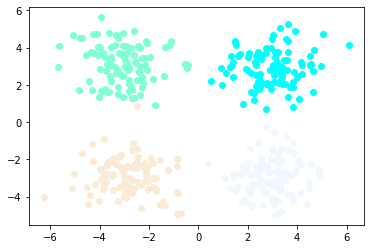

In [26]:
# Par exemple :
ut.plot2DSetMulticlass(Xmulti,Ymulti)

In [27]:
# Exemples de la classe 0
Xmulti[Ymulti==0][0:5,:]

array([[ 3.49671415, -3.1382643 ],
       [ 3.64768854, -1.47697014],
       [ 2.76584663, -3.23413696],
       [ 4.57921282, -2.23256527],
       [ 2.53052561, -2.45743996]])

In [28]:
# Exemples de la classe 1
Xmulti[Ymulti==1][0:5,:]

array([[-2.64221264, -2.43921547],
       [-1.91694876, -1.94619795],
       [-4.37766937, -3.93782504],
       [-2.48496473, -2.48621405],
       [-2.48495231,  0.85273149]])

In [29]:
# Exemples de la classe 2
Xmulti[Ymulti==2][0:5,:]

array([[1.40557234, 2.40062498],
       [3.0052437 , 3.04698059],
       [2.54993453, 3.62284993],
       [1.93237957, 2.85762051],
       [3.12029563, 3.51443883]])

In [30]:
# Exemples de la classe 3
Xmulti[Ymulti==3][0:5,:]

array([[-2.24301138,  2.07783468],
       [-2.13039408,  4.35563786],
       [-2.5865651 ,  4.87679581],
       [-3.7737892 ,  1.7553453 ],
       [-4.77872025,  4.49604431]])

In [31]:
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Création d'un perceptron
perceptronV3 = classif.ClassifierPerceptronBiais(2,learning_rate)

perceptmulti = classif.ClassifierMultiOAA(perceptronV3)

In [32]:
perceptmulti.train(Xmulti,Ymulti)
print("Accuracy globale: ",perceptmulti.accuracy(Xmulti,Ymulti))

Accuracy globale:  0.9975


In [33]:
for i in range(0,5):
    print(i+1,": (",Ymulti[i],") --> ",perceptmulti.predict(Xmulti[i,:]), "(",perceptmulti.score(Xmulti[i,:]),")")

1 : ( 0 ) -->  0 ( [1.4843744652191428, -0.0032715329414116923, 0.20883093149360654, -1.528281318015313] )
2 : ( 0 ) -->  0 ( [1.1405658179036835, -0.43491294214703313, 0.6159900151604498, -1.1867029671333227] )
3 : ( 0 ) -->  0 ( [1.344790992826597, 0.177961730367462, -0.0014098705320311211, -1.3793806398601984] )
4 : ( 0 ) -->  0 ( [1.517742379988568, -0.4551017234597937, 0.6894464583758992, -1.5755912880734617] )
5 : ( 0 ) -->  0 ( [1.1165194045656952, 0.04237717679461128, 0.10984247044335937, -1.148259517482383] )


In [34]:
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Création d'un KNN
kppvMC = classif.ClassifierKNN(2,3)

kppvMulti = classif.ClassifierMultiOAA(kppvMC)

In [35]:
kppvMulti.train(Xmulti,Ymulti)
print("Accuracy globale: ",kppvMulti.accuracy(Xmulti,Ymulti))

Accuracy globale:  0.9975


Pour avoir un affichage de la frontière de séparation des classes, il faut une version de la fonction `plot_frontiere` qui soit capable de traiter plusieurs classes, que l'on considère égales à 0, 1, 2, 3,...

In [36]:
def plot_frontiere_multiclass(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
        cette version reconnaît jusqu'à 4 classes (notée: 0, 1, 2 et 3)
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon",'skyblue','#FFDF9E','#B1FB17'],levels=[-1,0,1,2,3,4])    

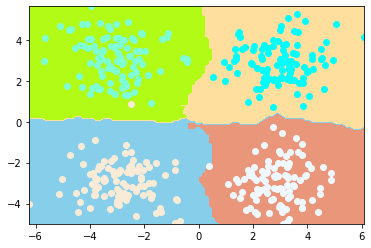

In [37]:
# Affichage de la frontière de séparation des classes
plot_frontiere_multiclass(Xmulti,Ymulti,kppvMulti,step=100)
ut.plot2DSetMulticlass(Xmulti,Ymulti)

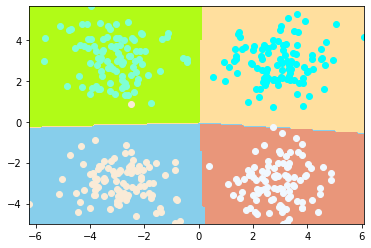

In [38]:
# Affichage de la frontière de séparation des classes
plot_frontiere_multiclass(Xmulti,Ymulti,perceptmulti,step=150)
ut.plot2DSetMulticlass(Xmulti,Ymulti)


In [39]:
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

niter = 10 
perf = []

tic = timeit.default_timer() # heure de départ
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xmulti, Ymulti, niter, i)
    cl = classif.ClassifierMultiOAA(classif.ClassifierPerceptronBiais(2,learning_rate))
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])
toc = timeit.default_timer() # heure d'arrivée

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)

print(f'\nTemps mis: --> {toc-tic:.5f} secondes')
print(f'Résultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  360  |Ytest|=  40 	perf=  0.975
Apprentissage  2 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  3 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  4 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  5 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  6 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  7 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  8 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  9 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  10 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0

Temps mis: --> 0.08909 secondes
Résultat global:	moyenne= 0.997	écart-type= 0.008


# 2. Expérimentations 

Compléter ce notebook aevc des expérimentations permettant de réaliser une comparaison des algorithmes que vous avez implémentés (kppv, perceptron, kernel perceptron, adaline) sur un jeu de données réelles.


Je vais dans un premier temps présenter le reste des algorithmes n'ayant pas été présentés lors de la partie **Mise en place** dans une partie **Présentation** :
<br/> - classifieur Adaline
<br/> - classifieur Adaline2 (analytique)
<br/> - algorithme crossval (non stratifié)

Je réaliserai ensuite des comparaisons entre les différents algorithmes implémentés sur un jeu de données réelles dans la partie **Comparaisons**.

# 2.1. Présentation

### **Classifieur Adaline**

In [40]:
# Selection d'une seed aléatoire
np.random.seed()

# Génération rapide d'un jeu de données 2D:
N = 100
X,Y =  ut.genere_dataset_gaussian([-2,-2],[[1,0],[0,1]], [2,2],[[1,0],[0,1]],N)

Accuracy du perceptron ( 0.001 ) après 1 train:  1.0
Vecteur de poids trouvé:  [[-0.10196944 -0.33281411]]


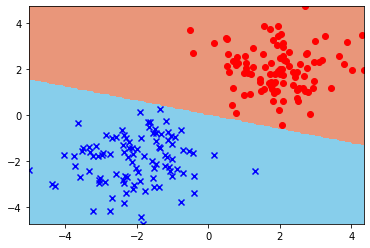

In [44]:
# On crée un perceptron Adaline allant étudier ce jeu de données sur 1 itération de train
learning_rate = 1e-3
adaline = classif.ClassifierADALINE(2, learning_rate, history=True)

t = 1
for i in range(t) :
    adaline.train(X, Y)

print("Accuracy du perceptron (", learning_rate,") après", t, "train: ", adaline.accuracy(X,Y))  
print("Vecteur de poids trouvé: ", adaline.getW())

ut.plot_frontiere(X,Y,adaline,step=150)
ut.plot2DSet(X,Y)

Accuracy du perceptron ( 0.001 ) après 100 train:  1.0
Vecteur de poids trouvé:  [[-0.24194637 -0.1918137 ]]


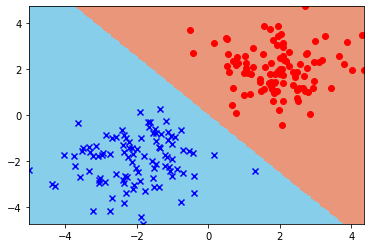

In [45]:
# On crée un perceptron Adaline allant étudier ce jeu de données sur 100 itérations de train
learning_rate = 1e-3
adaline = classif.ClassifierADALINE(2, learning_rate, history=True)

t = 100
for i in range(t) :
    adaline.train(X, Y)

print("Accuracy du perceptron (", learning_rate,") après", t, "train: ", adaline.accuracy(X,Y))  
print("Vecteur de poids trouvé: ", adaline.getW())

ut.plot_frontiere(X,Y,adaline,step=150)
ut.plot2DSet(X,Y)

### **PerceptronAdaline2 (analytique)**

Accuracy du perceptron:  1.0
Vecteur de poids trouvé:  [-0.22247808 -0.22152574]


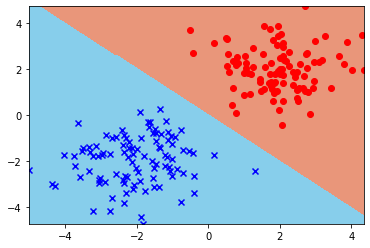

In [46]:
# On crée un perceptron Adaline allant étudier ce jeu de données
adaline2 = classif.ClassifierADALINE2(2)

# On ne peut train que une seule fois un PerceptronAdaline2 (le résultat sera toujours le meme)
adaline2.train(X, Y)

print("Accuracy du perceptron: ", adaline2.accuracy(X,Y))
print("Vecteur de poids trouvé: ", adaline2.getW())

ut.plot_frontiere(X, Y, adaline2, step=150)
ut.plot2DSet(X, Y)

Un des forces principales du classifieur ADALINE analytique est que l'entrainement de ce dernier est unique. On peut entrainer autant de fois que l'on souhaite un classifieur de ce genre, le résultat obtenu restera toujours le meme.

### **Crossval (non-stratifié)**

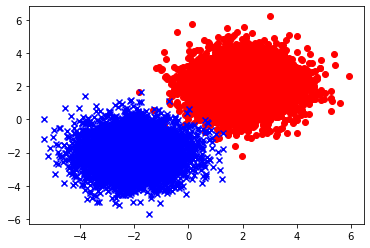

In [47]:
# Selection d'une seed aléatoire
np.random.seed()

# Génération rapide d'un jeu de données 2D de grande taille
N = 5000
X,Y =  ut.genere_dataset_gaussian([-2,-2],[[1,0],[0,1]], [2,2],[[1,0],[0,1]],N)

# On affiche la répartition des points
ut.plot2DSet(X, Y)

In [50]:
niter = 10 
perf = []

# On utilise dans un premier temps crossval
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = classif.ClassifierPerceptron(2,learning_rate)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')
print("\n\n")

niter = 10
perf = []

# On utilise désormais crossval_strat afin de les comparer
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X, Y, niter, i)
    cl = classif.ClassifierPerceptron(2,learning_rate)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval_strat :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.99
Apprentissage  2 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  1.0
Apprentissage  3 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.999
Apprentissage  4 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.99
Apprentissage  5 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.999
Apprentissage  6 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.999
Apprentissage  7 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.999
Apprentissage  8 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.997
Apprentissage  9 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.999
Apprentissage  10 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.997

Résultat global avec crossval :	moyenne= 0.997	écart-type= 0.004



Apprentissage  1 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.999
Apprentissage  2 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.997
Apprentissage  3 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.991
Apprentissage  4 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.999
Apprentissage  5 :	  |Ya

On remarque que la validation croisée stratifiée permet une meilleure performance en terme de précision.
<br/>On explique cela du fait que l'apprentissage du Classifieur lors de cette dernière est realisé avec autant de valeurs de chaque classe du dataset (soit autant de +1 que de -1 dans notre cas).
<br/>Lors de la validation croisée non-stratifiée, le Classifieur n'est pas soumis à cette condition et les valeurs d'apprentissage sont donc sélectionnées sans discrimination.
<br/>(Le Classifieur utilisé est le Perceptron basique)

# 2.2. Comparaisons sur données

Afin de comparer les performances de mes algorithmes de classifieurs, je vais les utiliser sur les données du fichier '**usps.pkl**' du TME4 afin de pouvoir comparer leurs performances.
<br/>Les comparaisons seront réalisées à l'aide du classifieur multi-classes en raison du nombre important de classes dans ces données.

In [51]:
import pickle as pkl

data = pkl.load(open('data/usps.pkl', 'rb'))
X = np.array(data['X_train'], dtype=float)
Y = np.array(data['Y_train'], dtype=float)

print("Les dimensions de X sont:", X.shape)

Les dimensions de X sont: (6229, 256)


In [175]:
import copy
def calcul_efficacite(classif, X, Y):
    
    # Parametres
    niter = 10 # Nombre d'itération
    perf = [] # Liste des performances des algos

    # Temps de départ
    startTime = timeit.default_timer()
    
    # Boucle principale
    for i in range(niter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X, Y, niter, i)
        classif_en_cours = copy.deepcopy(classif)
        for j in range(5):
            classif_en_cours.train(Xapp, Yapp)
        perf.append(classif_en_cours.accuracy(Xtest, Ytest))
        print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])
        
    # Temps de fin
    endTime = timeit.default_timer()

    # On transforme la liste en array numpy pour avoir les fonctions statistiques:
    perf = np.array(perf)

    # Affichage
    print(f'\nTemps mis: --> {endTime - startTime:.5f} secondes')
    print(f'Résultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

In [176]:
# Paramètres
learning_rate = 1e-3

In [189]:
calcul_efficacite(classif.ClassifierMultiOAA(classif.ClassifierPerceptron(X.shape[1], learning_rate)), X, Y)

Apprentissage  1 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.8723747980613893
Apprentissage  2 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.8869143780290791
Apprentissage  3 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.8675282714054927
Apprentissage  4 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.901453957996769
Apprentissage  5 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9063004846526656
Apprentissage  6 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.877221324717286
Apprentissage  7 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.8949919224555735
Apprentissage  8 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9127625201938611
Apprentissage  9 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.8901453957996769
Apprentissage  10 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.851373182552504

Temps mis: --> 6.44773 secondes
Résultat global:	moyenne= 0.886	écart-type= 0.018


In [178]:
calcul_efficacite(classif.ClassifierMultiOAA(classif.ClassifierPerceptronBiais(X.shape[1], learning_rate)), X, Y)

Apprentissage  1 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.8966074313408724
Apprentissage  2 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9353796445880452
Apprentissage  3 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9079159935379645
Apprentissage  4 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9095315024232633
Apprentissage  5 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9192245557350566
Apprentissage  6 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9111470113085622
Apprentissage  7 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9192245557350566
Apprentissage  8 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9305331179321487
Apprentissage  9 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9143780290791599
Apprentissage  10 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.8998384491114702

Temps mis: --> 7.39881 secondes
Résultat global:	moyenne= 0.914	écart-type= 0.012


In [179]:
calcul_efficacite(classif.ClassifierMultiOAA(classif.ClassifierADALINE(X.shape[1], learning_rate)), X, Y)

Apprentissage  1 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.2197092084006462
Apprentissage  2 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.2455573505654281
Apprentissage  3 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.210016155088853
Apprentissage  4 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.23747980613893377
Apprentissage  5 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.1987075928917609
Apprentissage  6 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.1825525040387722
Apprentissage  7 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.2665589660743134
Apprentissage  8 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.26009693053311794
Apprentissage  9 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.2310177705977383
Apprentissage  10 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.21163166397415187

Temps mis: --> 6.87063 secondes
Résultat global:	moyenne= 0.226	écart-type= 0.025


In [181]:
calcul_efficacite(classif.ClassifierMultiOAA(classif.ClassifierADALINE2(X.shape[1])), X, Y)

Apprentissage  1 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.8852988691437803
Apprentissage  2 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9030694668820679
Apprentissage  3 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9063004846526656
Apprentissage  4 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.8804523424878837
Apprentissage  5 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.8949919224555735
Apprentissage  6 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.8820678513731826
Apprentissage  7 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9127625201938611
Apprentissage  8 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.9111470113085622
Apprentissage  9 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.8820678513731826
Apprentissage  10 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.875605815831987

Temps mis: --> 9.97721 secondes
Résultat global:	moyenne= 0.893	écart-type= 0.013


In [69]:
calcul_efficacite(classif.ClassifierMultiOAA(classif.ClassifierKNN(X.shape[1], 5)), X, Y)

Apprentissage  1 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17932148626817448
Apprentissage  2 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.1825525040387722
Apprentissage  3 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17609046849757673
Apprentissage  4 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.18739903069466882
Apprentissage  5 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.18093699515347333
Apprentissage  6 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17124394184168013
Apprentissage  7 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.1841680129240711
Apprentissage  8 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17609046849757673
Apprentissage  9 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.1777059773828756
Apprentissage  10 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.1777059773828756

Temps mis: --> 631.80494 secondes
Résultat global:	moyenne= 0.179	écart-type= 0.004


In [188]:
calcul_efficacite(classif.ClassifierMultiOAA(classif.ClassifierLineaireRandom(X.shape[1])), X, Y)

Apprentissage  1 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17124394184168013
Apprentissage  2 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17124394184168013
Apprentissage  3 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17124394184168013
Apprentissage  4 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17124394184168013
Apprentissage  5 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17124394184168013
Apprentissage  6 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17124394184168013
Apprentissage  7 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17124394184168013
Apprentissage  8 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17124394184168013
Apprentissage  9 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17124394184168013
Apprentissage  10 :	  |Yapp|=  5610  |Ytest|=  619 	perf=  0.17124394184168013

Temps mis: --> 30.93586 secondes
Résultat global:	moyenne= 0.171	écart-type= 0.000


### **Résultats des comparaisons**

Parmi les classifieurs utilisés, on remarque 4 classifieurs dont les résultats sont conformes aux attentes et 2 classifieurs dont les résultats sont anormaux.

Pour les classifieurs aux résultats corrects, on retrouve :
<br/> - classifieur Perceptron
<br/> - classifieur PerceptronBiais
<br/> - classifieur Adaline2
<br/> - classifieur LineaireRandom

On a pour ces classifieurs, sauf le LinaireRandom, une précision moyenne grace à la validation croisée stratifiée aux alentours des 90%, ce qui signifie qu'uniquement 1/10 des points se retrouvent mal classés après apprentissage.
<br/> On remarque que le classifieur PerceptronBiais affiche un meilleur résultat (91.4% de précision) que le classifieur Perceptron classique (88.6% de précision). On explique cette difference du fait que l'entrainement du PerceptronBiais est plus rigoureux que celui du Perceptron, puisqu'il considère qu'un point n'est bien classé lors de l'apprentissage que lorsqu'il remplit la condition : **w * x * y > 1**.
<br/> Le classifieur Adaline2 (89.3% de précision) affichera toujours le meme résultat en raison de sa méthode d'apprentissage (calcul matriciel). 
<br/> Le classifieur LineaireRandom est un cas à part puisque la mise en place des valeurs de son vecteur de poids est totalement aléatoire et de ce fait, il n'est pas possible d'obtenir une précision stable lors de l'utilisation de l'algorithme.

Pour les classifieurs aux résultats anormaux, on retrouve :
<br/> - classifieur PerceptronKNN
<br/> - classifieur Adaline

La raison pour laquelle ces classifieurs n'affichent pas des résultats convenables est surement lié à la manière dont je les ai codé.
<br/>Lors de l'étude de données à 2 classes, ces deux classifieurs affichent des résultats de précision similaires aux 4 autres évoqués plus haut (à l'exception du LineaireRandom) comme peuvent le montrer les résultats des tests lors de la partie 1 du bilan.
<br/> J'ai surement du commettre des erreurs lors de la conception de mes algorithmes, nottament lors du traitement d'un nombre de classes supérieur à 2. Malgré plusieurs tentatives de correction et après avoir demandé de l'aide auprès de certains de mes camarades, je n'ai toujours pas réussi à résoudre ce problème.